In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
conn = sqlite3.connect('Data/FPA_FOD_20221014.sqlite')

In [3]:
cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
cursor.close()
print(tables)

['spatial_ref_sys', 'spatialite_history', 'geometry_columns', 'views_geometry_columns', 'virts_geometry_columns', 'geometry_columns_statistics', 'views_geometry_columns_statistics', 'virts_geometry_columns_statistics', 'geometry_columns_field_infos', 'views_geometry_columns_field_infos', 'virts_geometry_columns_field_infos', 'geometry_columns_time', 'geometry_columns_auth', 'views_geometry_columns_auth', 'virts_geometry_columns_auth', 'sql_statements_log', 'SpatialIndex', 'NWCG_UnitIdActive_20200123', 'Fires', 'idx_Fires_Shape', 'idx_Fires_Shape_rowid', 'idx_Fires_Shape_node', 'idx_Fires_Shape_parent']


In [4]:
df = pd.read_sql_query("select * from Fires", conn)
df.drop('Shape',axis=1, inplace=True)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,1730,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1530,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,2024,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1400,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1200,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 38 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   FOD_ID                         int64  
 2   FPA_ID                         object 
 3   SOURCE_SYSTEM_TYPE             object 
 4   SOURCE_SYSTEM                  object 
 5   NWCG_REPORTING_AGENCY          object 
 6   NWCG_REPORTING_UNIT_ID         object 
 7   NWCG_REPORTING_UNIT_NAME       object 
 8   SOURCE_REPORTING_UNIT          object 
 9   SOURCE_REPORTING_UNIT_NAME     object 
 10  LOCAL_FIRE_REPORT_ID           object 
 11  LOCAL_INCIDENT_ID              object 
 12  FIRE_CODE                      object 
 13  FIRE_NAME                      object 
 14  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 15  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 16  MTBS_ID                        object 
 17  MTBS_FIRE_NAME                 object 
 18  CO

In [6]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME'],
      dtype='object')

In [7]:
df['NWCG_GENERAL_CAUSE'].head()

0    Power generation/transmission/distribution
1                                       Natural
2                       Debris and open burning
3                                       Natural
4                                       Natural
Name: NWCG_GENERAL_CAUSE, dtype: object

In [8]:
california = df[(df['STATE']=='CA')]
california.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,1730,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1530,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,2024,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1400,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,1200,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County


In [9]:
california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251881 entries, 0 to 2303562
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   OBJECTID                       251881 non-null  int64  
 1   FOD_ID                         251881 non-null  int64  
 2   FPA_ID                         251881 non-null  object 
 3   SOURCE_SYSTEM_TYPE             251881 non-null  object 
 4   SOURCE_SYSTEM                  251881 non-null  object 
 5   NWCG_REPORTING_AGENCY          251881 non-null  object 
 6   NWCG_REPORTING_UNIT_ID         251881 non-null  object 
 7   NWCG_REPORTING_UNIT_NAME       251881 non-null  object 
 8   SOURCE_REPORTING_UNIT          251881 non-null  object 
 9   SOURCE_REPORTING_UNIT_NAME     251881 non-null  object 
 10  LOCAL_FIRE_REPORT_ID           68579 non-null   object 
 11  LOCAL_INCIDENT_ID              187285 non-null  object 
 12  FIRE_CODE                      640

In [10]:
california['FIRE_SIZE_CLASS'].value_counts()

FIRE_SIZE_CLASS
A    138489
B     96162
C     11802
D      2555
E      1389
F       946
G       538
Name: count, dtype: int64

In [11]:
california['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Missing data/not specified/undetermined       95263
Equipment and vehicle use                     45660
Natural                                       30290
Arson/incendiarism                            24412
Debris and open burning                       20861
Recreation and ceremony                       11453
Misuse of fire by a minor                      9316
Smoking                                        8472
Power generation/transmission/distribution     3677
Other causes                                    784
Railroad operations and maintenance             773
Fireworks                                       645
Firearms and explosives use                     275
Name: count, dtype: int64

/tmp/ipykernel_3203437/1603386098.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NWCG_GENERAL_CAUSE', data=california, palette='autumn', order=california['NWCG_GENERAL_CAUSE'].value_counts().index)


Text(0.5, 1.0, 'Number of fires in California (1992-2020) per cause')

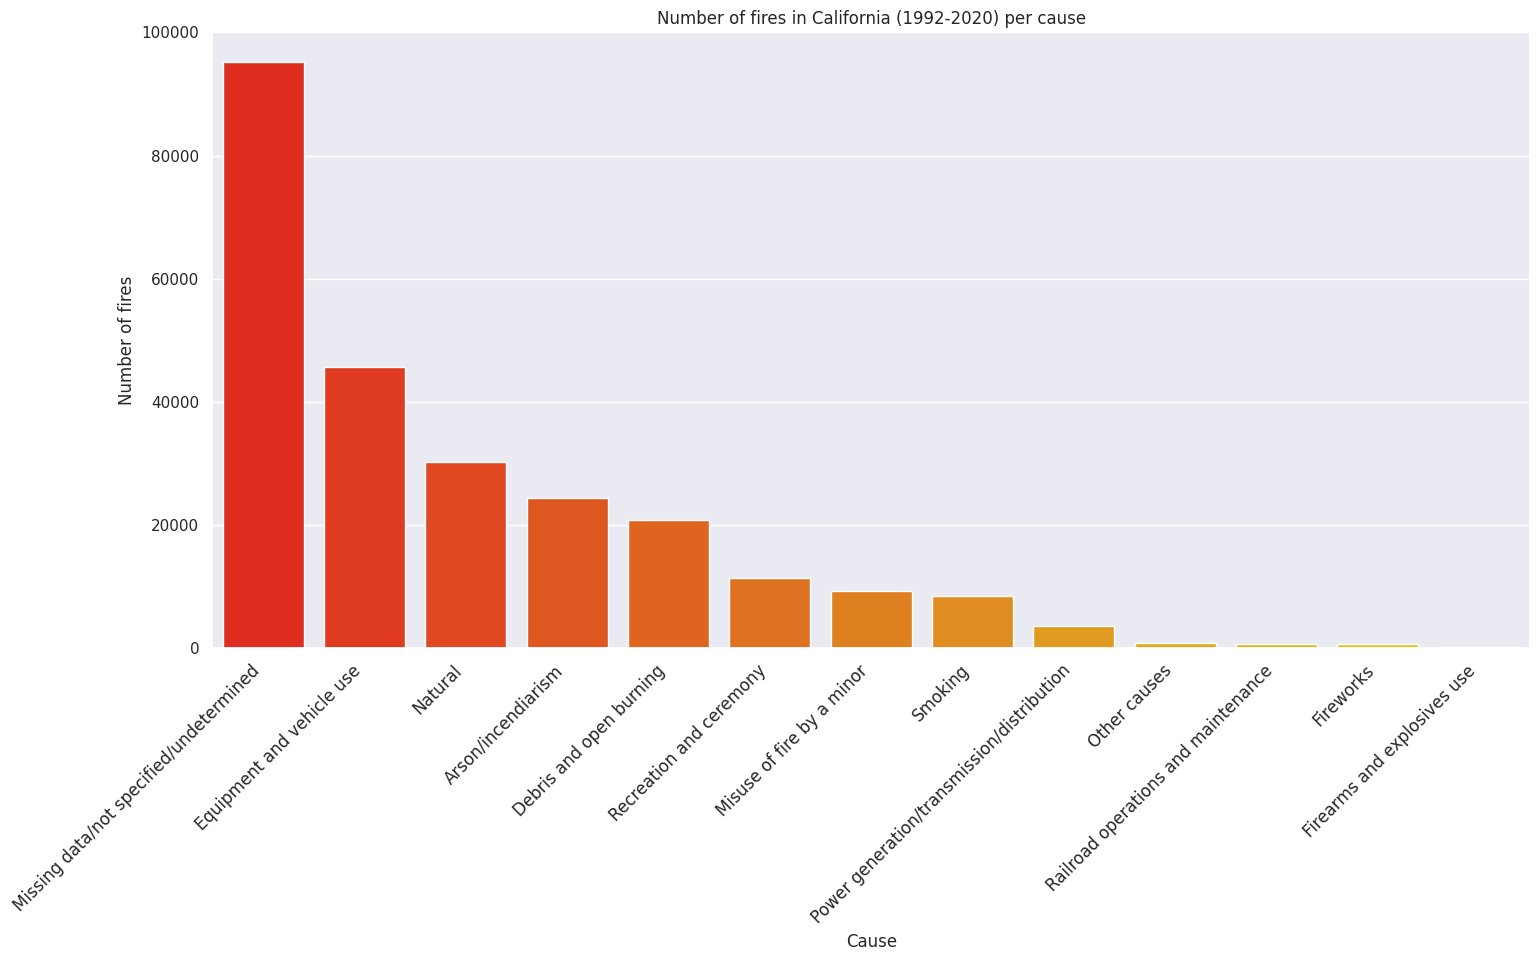

In [12]:
sns.set()
plt.figure(figsize=(17,8))
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)
sns.countplot(x='NWCG_GENERAL_CAUSE', data=california, palette='autumn', order=california['NWCG_GENERAL_CAUSE'].value_counts().index)
plt.xlabel('Cause')
plt.ylabel('Number of fires')
plt.title('Number of fires in California (1992-2020) per cause')

In [13]:
cali_years = pd.DataFrame(california['FIRE_YEAR'].value_counts())
cali_years.rename(columns={'FIRE_YEAR': 'fire_count'}, inplace=True)
cali_years

,count
FIRE_YEAR,
2007,13428
2006,12038
1992,10831
2008,10594
2005,10219
2020,10198
2009,9862
2017,9537
2018,9488


<Axes: ylabel='FIRE_YEAR'>

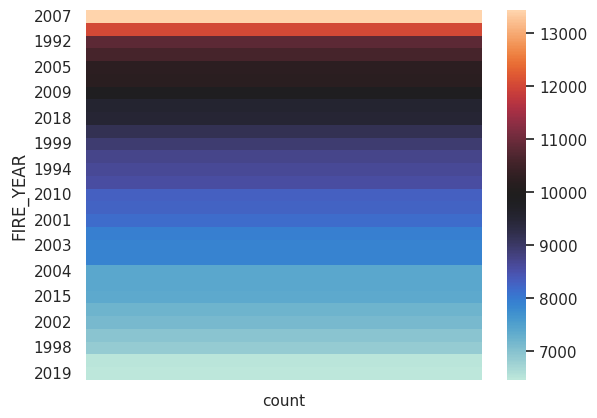

In [14]:
sns.heatmap(cali_years,cmap='icefire')

In [15]:
fires = california[['FIRE_YEAR', 'NWCG_GENERAL_CAUSE']]
fires['count'] = 1
fires.rename(columns={'NWCG_GENERAL_CAUSE': 'Cause'}, inplace=True)
fires

/tmp/ipykernel_3203437/1152389212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires['count'] = 1
/tmp/ipykernel_3203437/1152389212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires.rename(columns={'NWCG_GENERAL_CAUSE': 'Cause'}, inplace=True)


,FIRE_YEAR,Cause,count
0,2005,Power generation/transmission/distribution,1
1,2004,Natural,1
2,2004,Debris and open burning,1
3,2004,Natural,1
4,2004,Natural,1
...,...,...,...
2303542,2019,Missing data/not specified/undetermined,1
2303543,2019,Missing data/not specified/undetermined,1
2303551,2019,Missing data/not specified/undetermined,1
2303556,2019,Missing data/not specified/undetermined,1


In [16]:
pvfires = fires.pivot_table(values='count', index='FIRE_YEAR', columns='Cause', aggfunc=np.sum)
pvfires

/tmp/ipykernel_3203437/3735047228.py:1: FutureWarning: The provided callable <function sum at 0x7fd3fc190a60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pvfires = fires.pivot_table(values='count', index='FIRE_YEAR', columns='Cause', aggfunc=np.sum)


Cause,Arson/incendiarism,Debris and open burning,Equipment and vehicle use,Firearms and explosives use,Fireworks,Missing data/not specified/undetermined,Misuse of fire by a minor,Natural,Other causes,Power generation/transmission/distribution,Railroad operations and maintenance,Recreation and ceremony,Smoking
FIRE_YEAR,,,,,,,,,,,,,
1992,1151.0,690.0,2322.0,NaN,13.0,2420.0,548.0,2696.0,18.0,32.0,36.0,433.0,472.0
1993,1076.0,671.0,2176.0,NaN,15.0,2311.0,431.0,704.0,4.0,27.0,32.0,447.0,374.0
1994,767.0,706.0,2088.0,NaN,23.0,2220.0,410.0,1501.0,8.0,18.0,63.0,454.0,391.0
1995,1000.0,562.0,1977.0,NaN,12.0,1955.0,408.0,549.0,23.0,35.0,105.0,412.0,343.0
1996,952.0,649.0,2389.0,4.0,42.0,2007.0,408.0,1413.0,33.0,83.0,50.0,796.0,344.0
1997,764.0,750.0,2055.0,2.0,27.0,1838.0,336.0,1099.0,32.0,72.0,46.0,601.0,306.0
1998,766.0,423.0,1817.0,NaN,25.0,1650.0,273.0,1042.0,24.0,148.0,34.0,402.0,257.0
1999,905.0,744.0,2021.0,5.0,35.0,2227.0,301.0,1605.0,35.0,154.0,40.0,568.0,269.0
2000,711.0,625.0,1771.0,3.0,19.0,1786.0,267.0,888.0,20.0,95.0,59.0,492.0,234.0


Text(0.5, 1.0, 'Cause by Year in California')

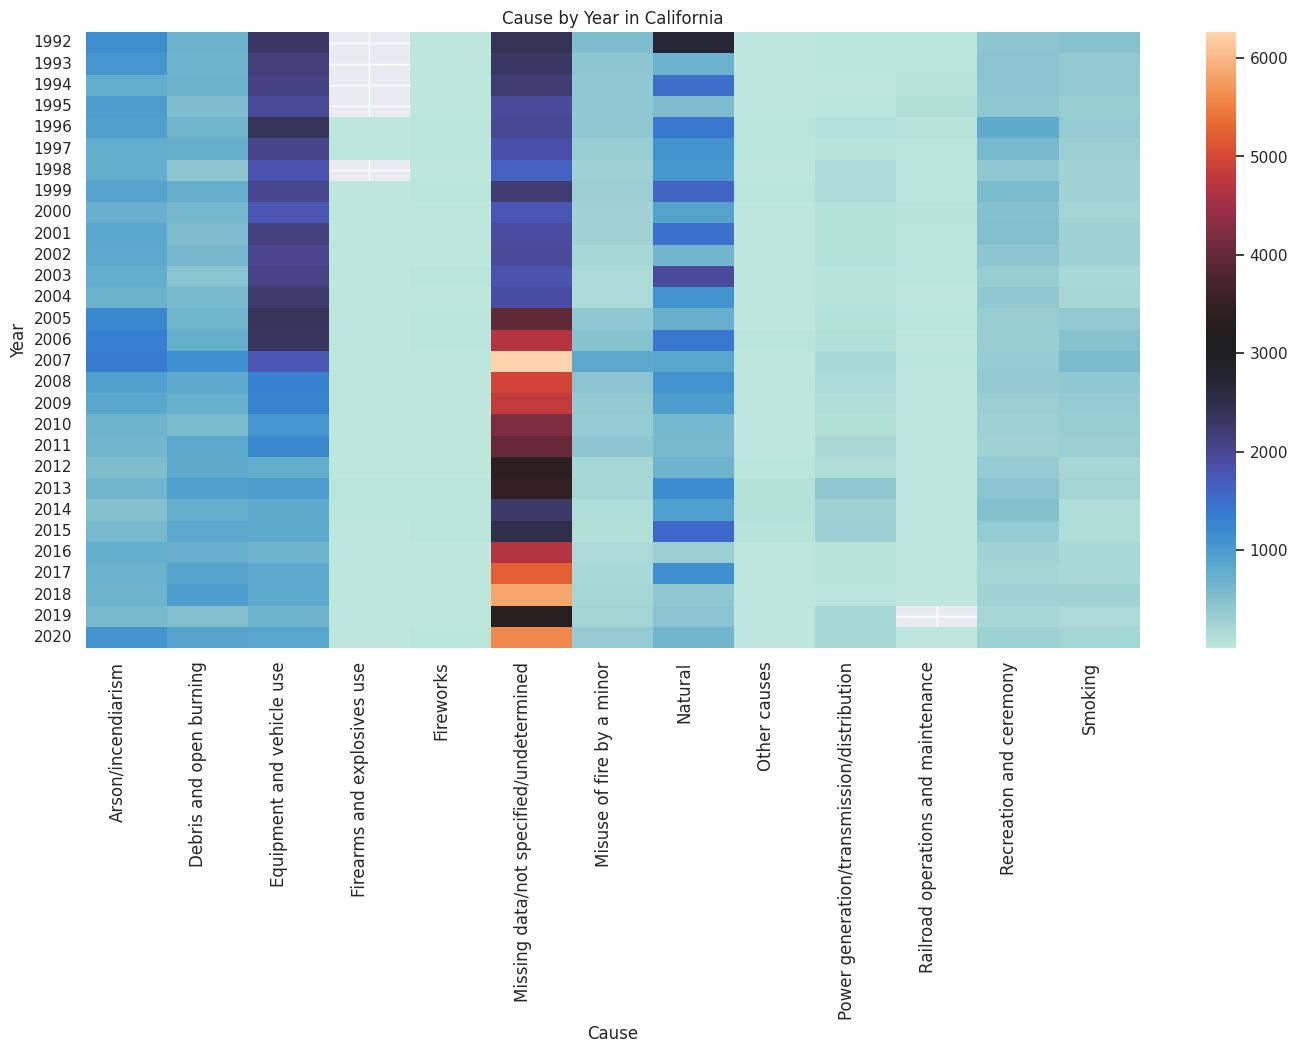

In [17]:
plt.figure(figsize=(17,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'  
)
sns.heatmap(data=pvfires, cmap='icefire')
plt.xlabel('Cause')
plt.ylabel('Year')
plt.title('Cause by Year in California')

In [18]:
california['DISCOVERY_DATE'].head()

0     2/2/2005
1    5/12/2004
2    5/31/2004
3    6/28/2004
4    6/28/2004
Name: DISCOVERY_DATE, dtype: object

In [19]:
# convert the discover date column to datetime type
california['DISCOVERY_DATE'] = pd.to_datetime(california['DISCOVERY_DATE'])

/tmp/ipykernel_3203437/457573850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['DISCOVERY_DATE'] = pd.to_datetime(california['DISCOVERY_DATE'])


In [20]:
# california['FIRE_DATE'] = pd.to_datetime(california['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
california['FIRE_DATE'] = pd.to_datetime(california['DISCOVERY_DATE'])
california['FIRE_MONTH'] = california['FIRE_DATE'].apply(lambda x: x.strftime('%B'))

/tmp/ipykernel_3203437/1849511383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['FIRE_DATE'] = pd.to_datetime(california['DISCOVERY_DATE'])
/tmp/ipykernel_3203437/1849511383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california['FIRE_MONTH'] = california['FIRE_DATE'].apply(lambda x: x.strftime('%B'))


In [21]:
months = california[['FIRE_YEAR', 'FIRE_MONTH']]
months['count'] = 1

/tmp/ipykernel_3203437/719442158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  months['count'] = 1


In [22]:
pvmonths = months.pivot_table(values='count',index='FIRE_YEAR',columns='FIRE_MONTH',aggfunc=np.sum)
pvmonths

/tmp/ipykernel_3203437/3549989098.py:1: FutureWarning: The provided callable <function sum at 0x7fd3fc190a60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pvmonths = months.pivot_table(values='count',index='FIRE_YEAR',columns='FIRE_MONTH',aggfunc=np.sum)


FIRE_MONTH,April,August,December,February,January,July,June,March,May,November,October,September
FIRE_YEAR,,,,,,,,,,,,
1992,259,2284,101,54,92,2062,2185,48,1339,293,753,1361
1993,201,1672,125,40,31,1677,1196,69,749,494,750,1264
1994,332,1380,95,79,189,2019,1441,192,617,190,590,1525
1995,103,1451,160,59,34,1721,938,34,315,503,983,1080
1996,488,2004,46,44,160,2158,1367,94,895,256,773,885
1997,572,1128,73,137,43,1795,1113,322,1130,187,504,924
1998,121,1720,133,19,36,1622,723,63,251,196,763,1214
1999,304,1881,300,87,205,1872,1264,150,753,262,702,1129
2000,286,1489,162,68,154,1496,1185,141,539,198,493,759


In [23]:
pvmonths = pvmonths.loc[:,['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']]

Text(178.75, 0.5, 'Year')

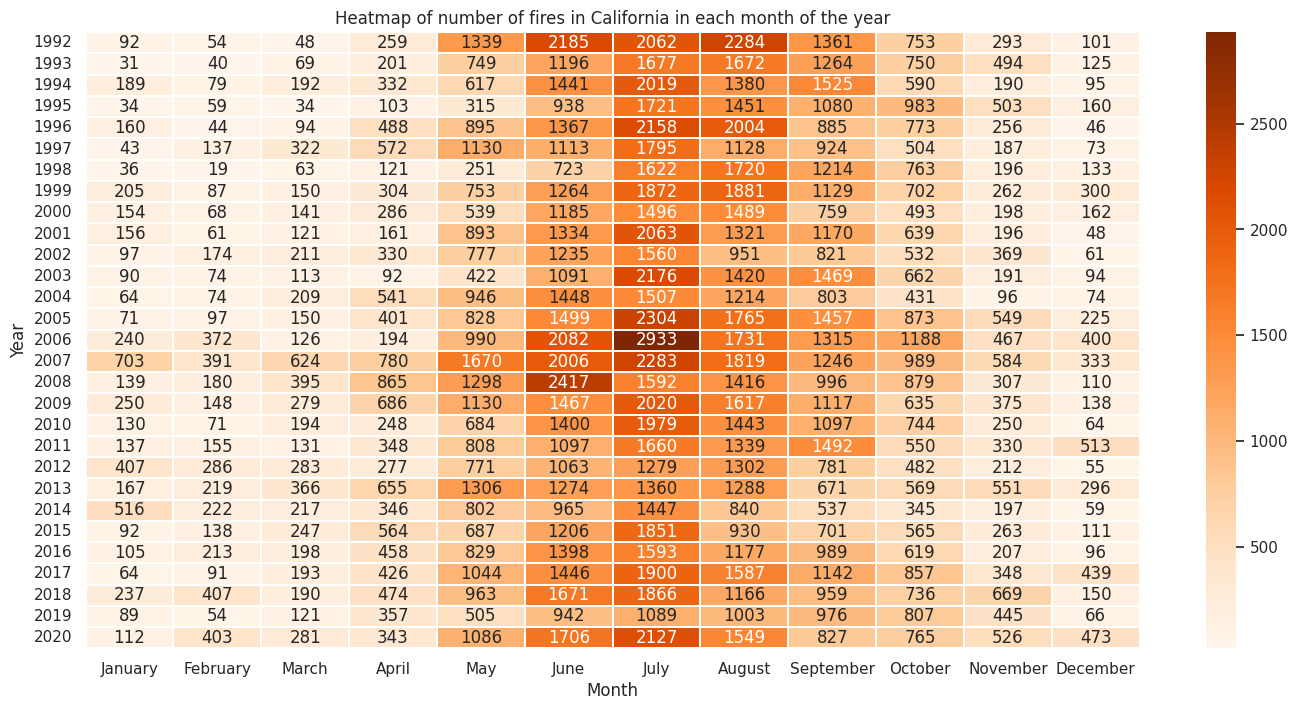

In [24]:
plt.figure(figsize=(17,8))
sns.heatmap(data=pvmonths, linewidths=0.05, cmap='Oranges', fmt='1.0f', annot=True)
plt.title('Heatmap of number of fires in California in each month of the year')
plt.xlabel('Month')
plt.ylabel('Year')

In [25]:
fires = california[['FIRE_YEAR', 'NWCG_GENERAL_CAUSE']]
fires['count'] = 1
fires.rename(columns={"NWCG_GENERAL_CAUSE": "Cause"}, inplace=True)
fires

/tmp/ipykernel_3203437/2528054443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires['count'] = 1
/tmp/ipykernel_3203437/2528054443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fires.rename(columns={"NWCG_GENERAL_CAUSE": "Cause"}, inplace=True)


,FIRE_YEAR,Cause,count
0,2005,Power generation/transmission/distribution,1
1,2004,Natural,1
2,2004,Debris and open burning,1
3,2004,Natural,1
4,2004,Natural,1
...,...,...,...
2303542,2019,Missing data/not specified/undetermined,1
2303543,2019,Missing data/not specified/undetermined,1
2303551,2019,Missing data/not specified/undetermined,1
2303556,2019,Missing data/not specified/undetermined,1


In [26]:
pivot = fires.groupby(by=['FIRE_YEAR','Cause']).count()
pivot

count
FIRE_YEAR Cause                                            
1992      Arson/incendiarism                           1151
          Debris and open burning                       690
          Equipment and vehicle use                    2322
          Fireworks                                      13
          Missing data/not specified/undetermined      2420
...                                                     ...
2020      Other causes                                   17
          Power generation/transmission/distribution    220
          Railroad operations and maintenance             4
          Recreation and ceremony                       273
          Smoking                                       226

[371 rows x 1 columns]

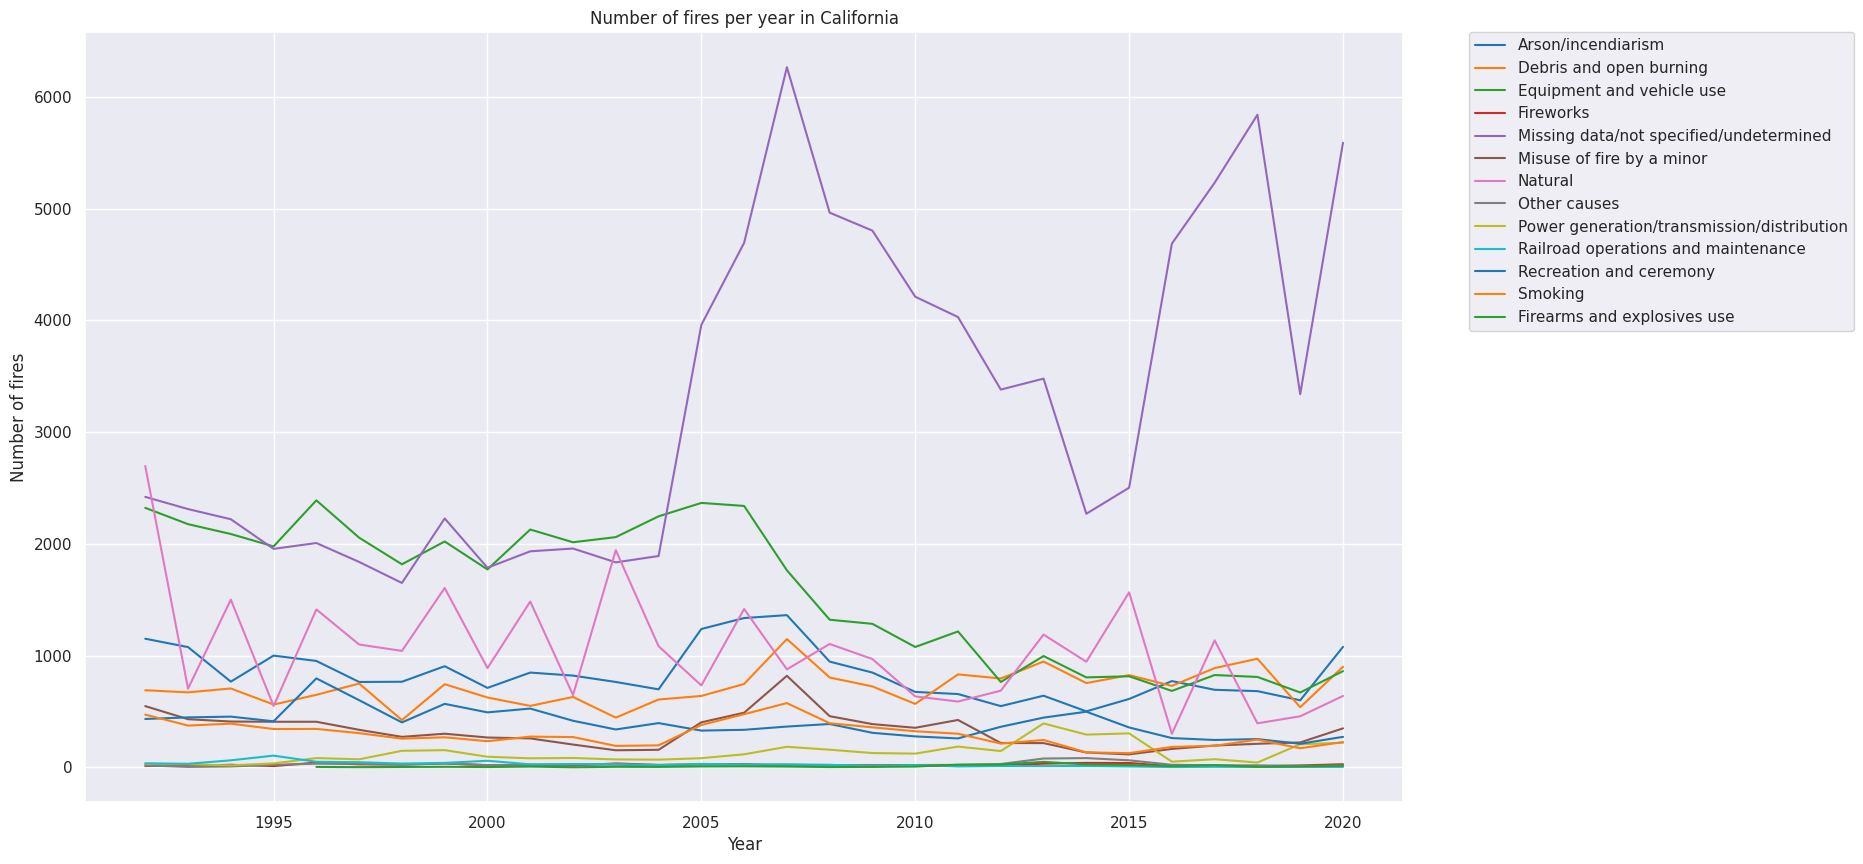

In [27]:
plt.figure(figsize=(17,10))
sns.lineplot(x='FIRE_YEAR',y='count',data=pivot.reset_index(),hue='Cause',palette='tab10')
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.title('Number of fires per year in California')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
biggest_fires = california[california['FIRE_SIZE_CLASS']=='G']
biggest_fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DATE,FIRE_MONTH
16,17,17,FS-1418878,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,G,38.523333,-120.211667,USFS,CA,5,06005,Amador County,2004-10-06,October
17,18,18,FS-1418881,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,G,38.780000,-120.260000,USFS,CA,17,06017,El Dorado County,2004-10-13,October
9330,9331,9376,FS-1436358,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,0417,Humboldt-Toiyabe National Forest,...,G,38.551667,-119.359444,USFS,CA,51,06051,Mono County,2006-07-17,July
12798,12799,12855,FS-1441162,FED,FS-FIRESTAT,FS,USCACNF,Cleveland National Forest,0502,Cleveland National Forest,...,G,33.851944,-117.649722,USFS,CA,59,06059,Orange County,2006-02-06,February
13731,13732,13793,FS-1442475,FED,FS-FIRESTAT,FS,USCACNF,Cleveland National Forest,0502,Cleveland National Forest,...,G,32.754444,-116.669167,USFS,CA,73,06073,San Diego County,2006-07-23,July


/tmp/ipykernel_3203437/177596469.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='NWCG_GENERAL_CAUSE', y='FIRE_SIZE', data=biggest_fires, order=biggest_fires['NWCG_GENERAL_CAUSE'].value_counts().index, palette='husl')
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 43.9% of the

Text(0.5, 1.0, 'Cause by Fire Size >5,000 Acres in California')

/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


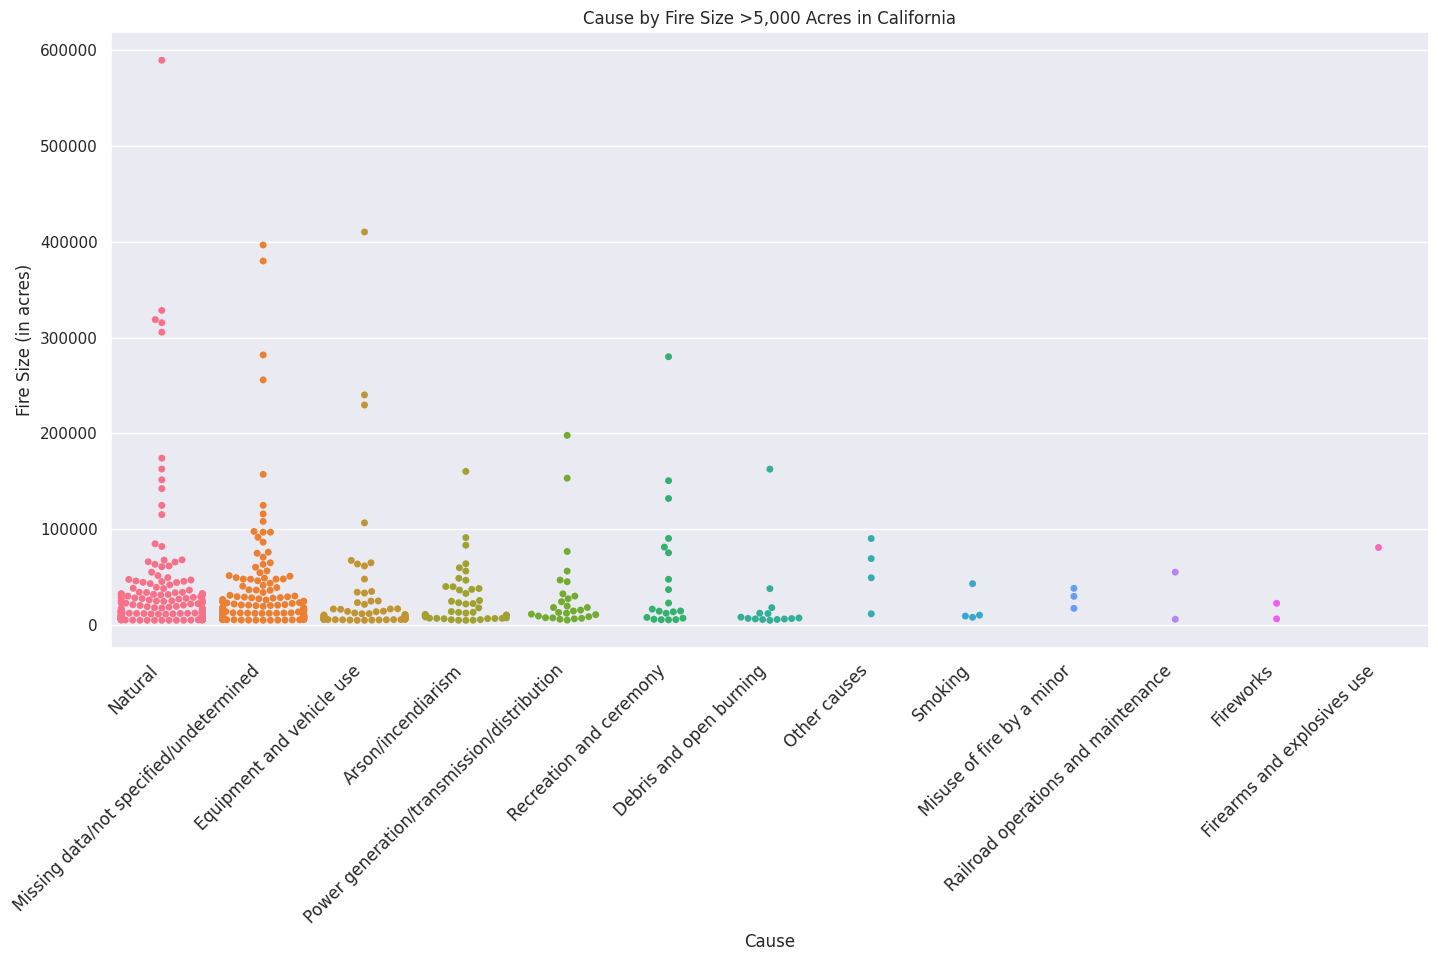

In [29]:
sns.set()
plt.figure(figsize=(17,8))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'  
)
sns.swarmplot(x='NWCG_GENERAL_CAUSE', y='FIRE_SIZE', data=biggest_fires, order=biggest_fires['NWCG_GENERAL_CAUSE'].value_counts().index, palette='husl')
plt.xlabel('Cause')
plt.ylabel('Fire Size (in acres)')
plt.title('Cause by Fire Size >5,000 Acres in California')

In [30]:
## Let's look at the month of January

In [31]:
jan_fires = california.loc[california['FIRE_MONTH']=='January'][['FIRE_YEAR', 'NWCG_GENERAL_CAUSE']]
jan_fires['count'] = 1
jan_fires.rename(columns={"NWCG_GENERAL_CAUSE": "Cause"}, inplace=True)
jan_fires

,FIRE_YEAR,Cause,count
3668,2005,Equipment and vehicle use,1
4313,2005,Equipment and vehicle use,1
4368,2005,Arson/incendiarism,1
6089,2005,Equipment and vehicle use,1
6531,2006,Recreation and ceremony,1
...,...,...,...
2291596,2020,Missing data/not specified/undetermined,1
2291604,2020,Missing data/not specified/undetermined,1
2291605,2020,Recreation and ceremony,1
2291607,2020,Missing data/not specified/undetermined,1


In [32]:
jan_pivot = jan_fires.groupby(by=['FIRE_YEAR','Cause']).count()
jan_pivot

count
FIRE_YEAR Cause                                         
1992      Arson/incendiarism                           6
          Debris and open burning                     32
          Equipment and vehicle use                   14
          Missing data/not specified/undetermined     23
          Misuse of fire by a minor                    6
...                                                  ...
2020      Equipment and vehicle use                    5
          Missing data/not specified/undetermined     66
          Misuse of fire by a minor                    7
          Other causes                                 1
          Recreation and ceremony                      4

[249 rows x 1 columns]

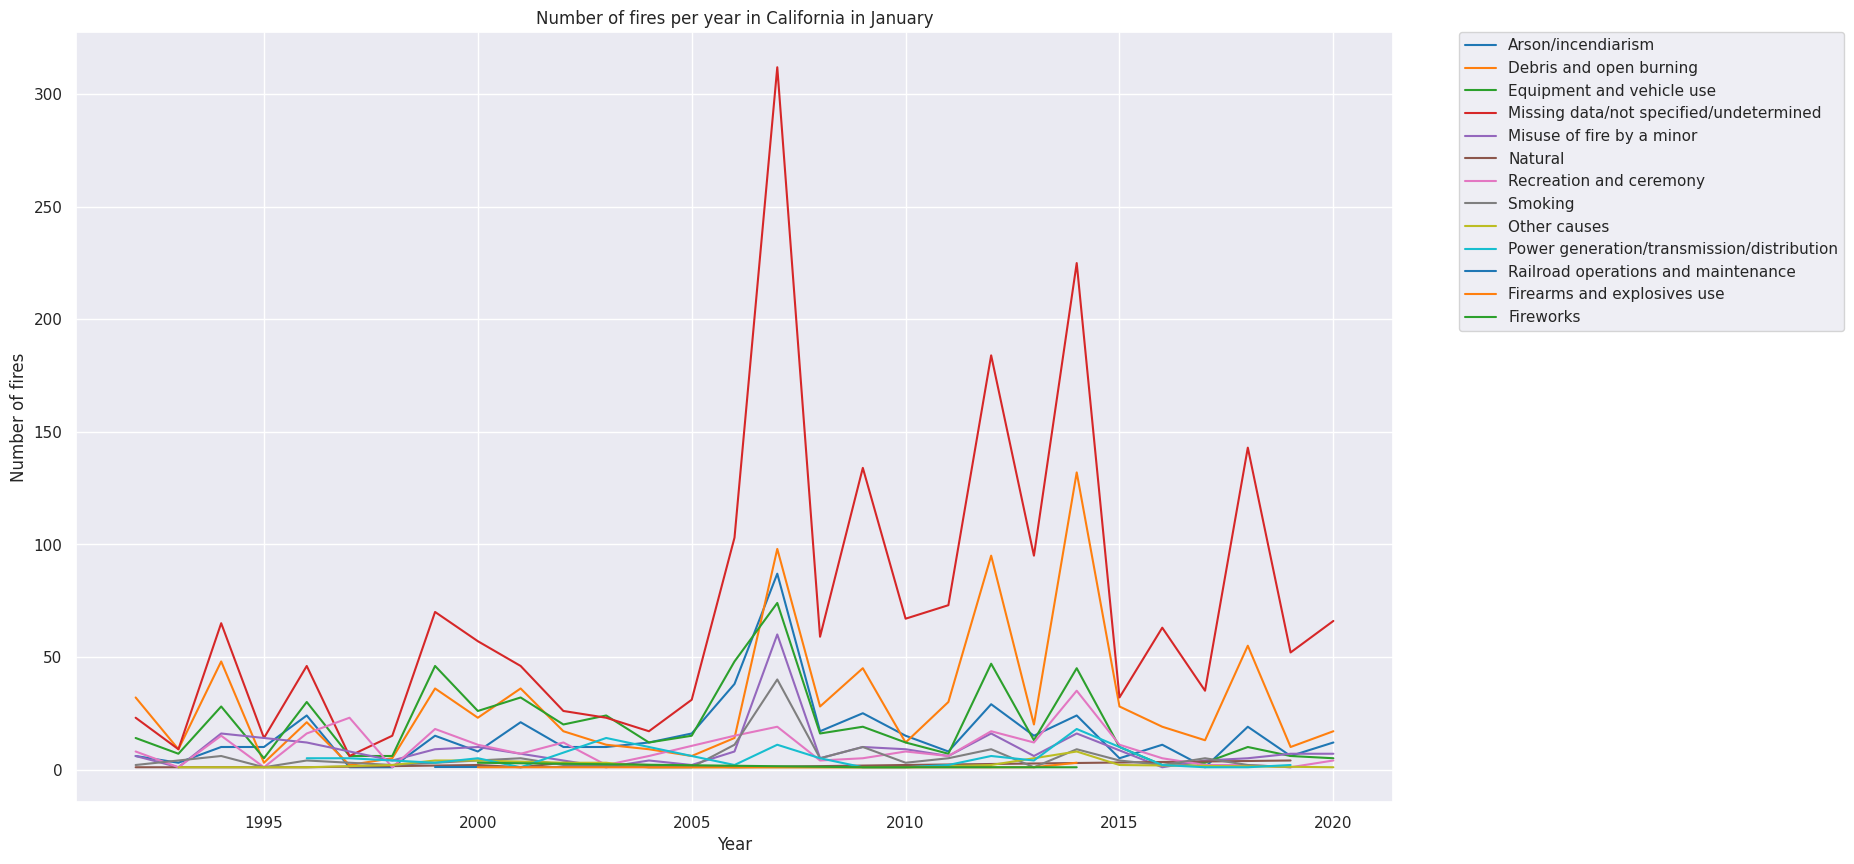

In [33]:
plt.figure(figsize=(17,10))
sns.lineplot(x='FIRE_YEAR',y='count',data=jan_pivot.reset_index(),hue='Cause',palette='tab10')
plt.xlabel('Year')
plt.ylabel('Number of fires')
plt.title('Number of fires per year in California in January')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [34]:
jan_fires_size = california.loc[california['FIRE_MONTH']=='January'][['FIRE_YEAR', 'FIRE_SIZE']]
jan_fires['count'] = 1
jan_fires.rename(columns={"NWCG_GENERAL_CAUSE": "Cause"}, inplace=True)
jan_fires

,FIRE_YEAR,Cause,count
3668,2005,Equipment and vehicle use,1
4313,2005,Equipment and vehicle use,1
4368,2005,Arson/incendiarism,1
6089,2005,Equipment and vehicle use,1
6531,2006,Recreation and ceremony,1
...,...,...,...
2291596,2020,Missing data/not specified/undetermined,1
2291604,2020,Missing data/not specified/undetermined,1
2291605,2020,Recreation and ceremony,1
2291607,2020,Missing data/not specified/undetermined,1


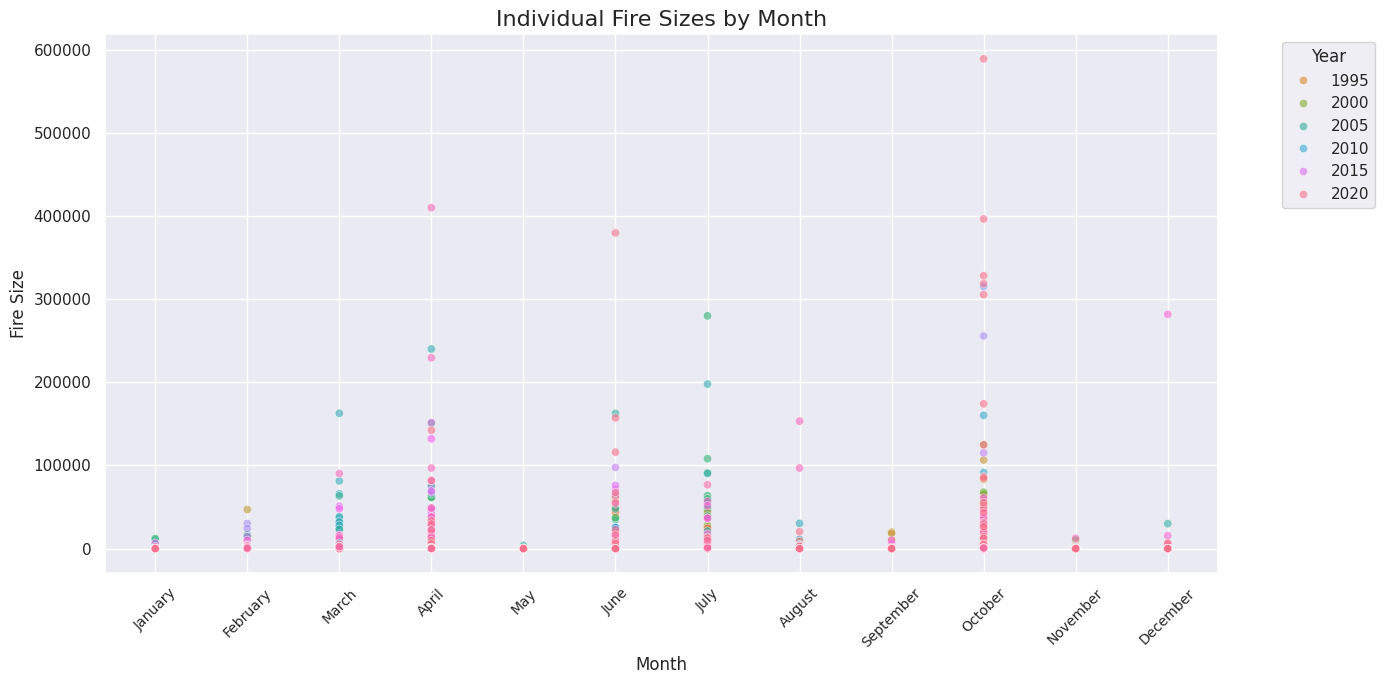

In [35]:
# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot the data
plt.figure(figsize=(14, 7))
sns.scatterplot(
    data=california, 
    x='FIRE_MONTH', 
    y='FIRE_SIZE', 
    hue='FIRE_YEAR', 
    palette='husl', 
    alpha=0.6
)

# Set the x-axis order and customize labels
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=45, fontsize=10)
plt.title('Individual Fire Sizes by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Fire Size', fontsize=12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()

plt.show()

/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 99.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 99.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mmoore/Projects/Wildfires/.venv/lib64/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 98.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


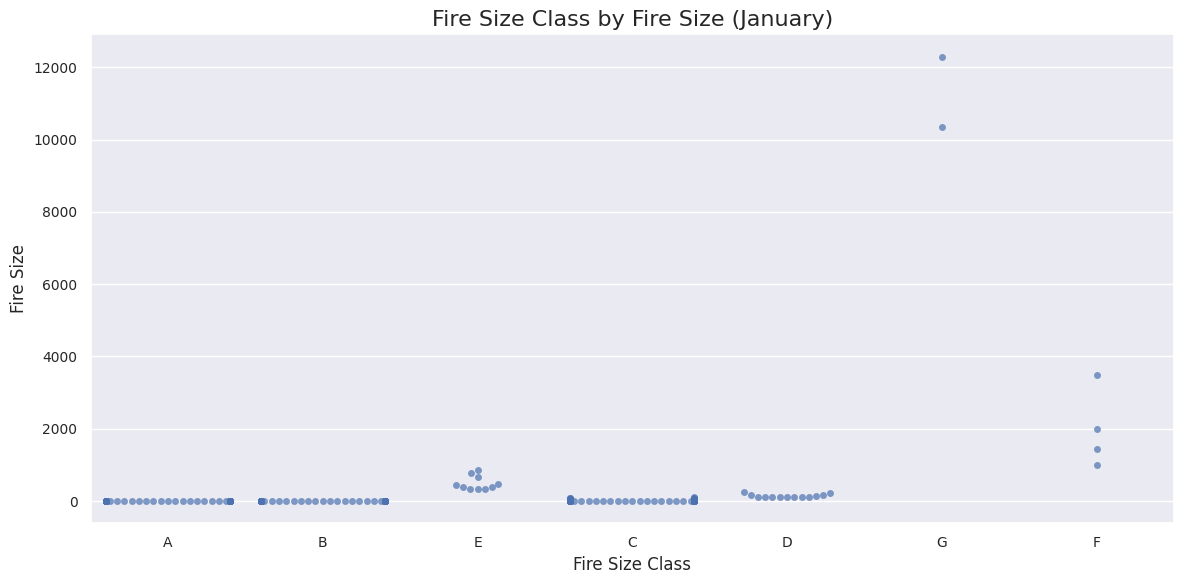

In [38]:
# Filter the dataset for January
january_data = california[california['FIRE_MONTH'] == 'January']

# Create the swarm plot
plt.figure(figsize=(12, 6))
# sns.swarmplot(
#     data=january_data, 
#     x='FIRE_SIZE_CLASS', 
#     y='FIRE_SIZE', 
#     palette='viridis', 
#     alpha=0.7
# )
sns.swarmplot(data=january_data, x='FIRE_SIZE_CLASS', y='FIRE_SIZE', dodge=True, alpha=0.7)

# Customize the plot
plt.title('Fire Size Class by Fire Size (January)', fontsize=16)
plt.xlabel('Fire Size Class', fontsize=12)
plt.ylabel('Fire Size', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [55]:
january_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4810 entries, 3668 to 2291658
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   OBJECTID                       4810 non-null   int64         
 1   FOD_ID                         4810 non-null   int64         
 2   FPA_ID                         4810 non-null   object        
 3   SOURCE_SYSTEM_TYPE             4810 non-null   object        
 4   SOURCE_SYSTEM                  4810 non-null   object        
 5   NWCG_REPORTING_AGENCY          4810 non-null   object        
 6   NWCG_REPORTING_UNIT_ID         4810 non-null   object        
 7   NWCG_REPORTING_UNIT_NAME       4810 non-null   object        
 8   SOURCE_REPORTING_UNIT          4810 non-null   object        
 9   SOURCE_REPORTING_UNIT_NAME     4810 non-null   object        
 10  LOCAL_FIRE_REPORT_ID           932 non-null    object        
 11  LOCAL_INCIDENT_I

In [39]:
january_data['FIRE_SIZE'].describe()

count     4810.000000
mean         8.859210
std        241.541876
min          0.010000
25%          0.100000
50%          0.100000
75%          1.000000
max      12300.010000
Name: FIRE_SIZE, dtype: float64